<a href="https://colab.research.google.com/github/Cloud88055/Esami/blob/main/Esame_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importo pandas
import pandas as pd

In [2]:
#importo il file .csv del covid
df=pd.read_csv("/content/drive/MyDrive/owid-covid-data.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [3]:
#1. Si richiede di verificare le dimensioni del dataset
df.shape

(429435, 67)

In [4]:
#i relativi metadati
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [5]:
#Si chiede di trovare, per ogni continente:
#a. il numero di casi fin dall'inizio della pandemia
#b. la percentuale rispetto al totale mondiale del numero di casi

In [29]:
#qui mi faccio stampare se ci sono i valori nulli nella colonna new_cases
print(df["new_cases"].isnull().sum())


0


In [7]:
#e li sostituisco con "0"
df["new_cases"]=df["new_cases"].fillna(0)


In [30]:
#stessa cosa per continent
print(df["continent"].isnull().sum())


0


In [9]:
#e sostituisco con "others"
df["continent"]=df["continent"].fillna("others")

In [10]:
#a. il numero di casi fin dall'inizio della pandemia, per continente
df.groupby("continent")["new_cases"].sum()

,new_cases
continent,
Africa,1.314683e+07
Asia,3.015642e+08
Europe,2.529169e+08
North America,1.244927e+08
Oceania,1.500347e+07
South America,6.881101e+07
others,2.512457e+09


In [11]:
#b. la percentuale rispetto al totale mondiale del numero di casi
totsum=df["new_cases"].sum()
print("Il totale mondiale di casi è", totsum)
print("la percentuale di casi in Africa rispetto al totale mondiale è", df.groupby("continent")["new_cases"].sum()["Africa"]/totsum*100,"%")
print("la percentuale di casi in Asia rispetto al totale mondiale è", df.groupby("continent")["new_cases"].sum()["Asia"]/totsum*100,"%")
print("la percentuale di casi in Europe rispetto al totale mondiale è", df.groupby("continent")["new_cases"].sum()["Europe"]/totsum*100,"%")
print("la percentuale di casi in North America rispetto al totale mondiale è", df.groupby("continent")["new_cases"].sum()["North America"]/totsum*100,"%")
print("la percentuale di casi in Oceania rispetto al totale mondiale è", df.groupby("continent")["new_cases"].sum()["Oceania"]/totsum*100,"%")
print("la percentuale di casi in South America rispetto al totale mondiale è", df.groupby("continent")["new_cases"].sum()["South America"]/totsum*100,"%")
print("la percentuale di casi in others rispetto al totale mondiale è", df.groupby("continent")["new_cases"].sum()["others"]/totsum*100,"%")

Il totale mondiale di casi è 3288392333.0
la percentuale di casi in Africa rispetto al totale mondiale è 0.39979508734610586 %
la percentuale di casi in Asia rispetto al totale mondiale è 9.170565719111838 %
la percentuale di casi in Europe rispetto al totale mondiale è 7.691201121651563 %
la percentuale di casi in North America rispetto al totale mondiale è 3.7858225355496233 %
la percentuale di casi in Oceania rispetto al totale mondiale è 0.4562554123921198 %
la percentuale di casi in South America rispetto al totale mondiale è 2.092542647951734 %
la percentuale di casi in others rispetto al totale mondiale è 76.40381747599702 %


In [12]:
#Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati:
#a. l'evoluzione dei casi totali dall'inizio alla fine dell'anno
#b. il numero di nuovi casi rispetto alla data
#k. poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni

In [13]:
#mi assicuro che la colonna "date" sia di tipo datetime
df["date"] = pd.to_datetime(df["date"])

#Selezionare i dati relativi all'Italia nel 2022
italia2022=df[(df["location"] == "Italy") & (df["date"].dt.year == 2022)]
#k. poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni

#qui filtro per i dati maggiori di 0
italianew=df[(df["new_cases"]>0) & (df["location"] == "Italy") & (df["date"].dt.year == 2022)]

#"italia2022" mostra i dati relativi all'italia nel 2022 senza filtri
italia2022


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
186002,ITA,Europe,Italy,2022-01-01,5622431.0,0.0,36797.000,136530.0,0.0,140.857,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186003,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.286,137513.0,983.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,168226.3,12.99,8.06,2849.4834
186004,ITA,Europe,Italy,2022-01-03,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186005,ITA,Europe,Italy,2022-01-04,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186006,ITA,Europe,Italy,2022-01-05,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186362,ITA,Europe,Italy,2022-12-27,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186363,ITA,Europe,Italy,2022-12-28,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186364,ITA,Europe,Italy,2022-12-29,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186365,ITA,Europe,Italy,2022-12-30,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN


In [14]:
#"italianew" mostra i dati relativi all'italia nel 2022 con i new_cases maggiori di 0
italianew

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
186003,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.286,137513.0,983.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,168226.30,12.99,8.06,2849.4834
186010,ITA,Europe,Italy,2022-01-09,7281297.0,1014262.0,144894.571,138881.0,1368.0,195.429,...,27.8,NaN,3.18,83.51,0.892,59037472,168831.80,12.89,3.94,2859.7395
186017,ITA,Europe,Italy,2022-01-16,8549450.0,1268153.0,181164.714,140856.0,1975.0,282.143,...,27.8,NaN,3.18,83.51,0.892,59037472,170089.10,12.83,8.03,2881.0361
186024,ITA,Europe,Italy,2022-01-23,9781191.0,1231741.0,175963.000,143296.0,2440.0,348.571,...,27.8,NaN,3.18,83.51,0.892,59037472,171694.19,12.80,10.40,2908.2239
186031,ITA,Europe,Italy,2022-01-30,10821375.0,1040184.0,148597.714,145914.0,2618.0,374.000,...,27.8,NaN,3.18,83.51,0.892,59037472,174151.69,12.84,16.50,2949.8500
186038,ITA,Europe,Italy,2022-02-06,11542793.0,721418.0,103059.714,148542.0,2628.0,375.429,...,27.8,NaN,3.18,83.51,0.892,59037472,176219.19,12.85,13.98,2984.8700
186045,ITA,Europe,Italy,2022-02-13,12053330.0,510537.0,72933.857,150824.0,2282.0,326.000,...,27.8,NaN,3.18,83.51,0.892,59037472,177489.48,12.81,8.88,3006.3870
186052,ITA,Europe,Italy,2022-02-20,12427773.0,374443.0,53491.857,152848.0,2024.0,289.143,...,27.8,NaN,3.18,83.51,0.892,59037472,178007.39,12.72,3.66,3015.1594
186059,ITA,Europe,Italy,2022-02-27,12732680.0,304907.0,43558.143,154416.0,1568.0,224.000,...,27.8,NaN,3.18,83.51,0.892,59037472,178015.30,12.60,0.06,3015.2935
186066,ITA,Europe,Italy,2022-03-06,12990223.0,257543.0,36791.857,155782.0,1366.0,195.143,...,27.8,NaN,3.18,83.51,0.892,59037472,178133.80,12.48,0.86,3017.3005


In [15]:
#a. l'evoluzione dei casi totali dall'inizio alla fine dell'anno
italiatot=italia2022[["date","total_cases"]].dropna()
print("i casi totali in italia nel 2022\n\n",italia2022[["date","total_cases"]])

i casi totali in italia nel 2022

              date  total_cases
186002 2022-01-01    5622431.0
186003 2022-01-02    6267035.0
186004 2022-01-03    6267035.0
186005 2022-01-04    6267035.0
186006 2022-01-05    6267035.0
...           ...          ...
186362 2022-12-27   25060503.0
186363 2022-12-28   25060503.0
186364 2022-12-29   25060503.0
186365 2022-12-30   25060503.0
186366 2022-12-31   25060503.0

[365 rows x 2 columns]


<Axes: xlabel='date'>

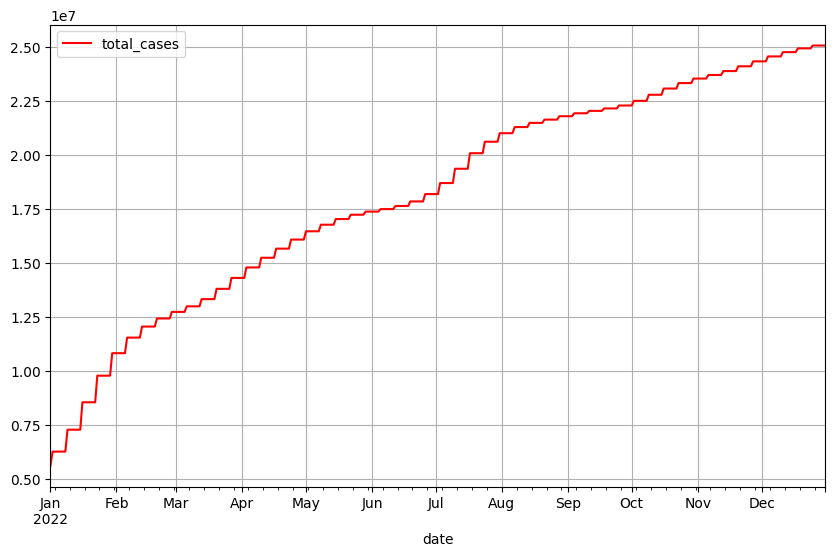

In [16]:
#faccio il grafico dall'inizio fino a fine anno
italiatot.plot(x="date",y="total_cases",color="red",figsize=(10,6),grid=True)

In [17]:
#b. il numero di nuovi casi rispetto alla data
print("i nuovi casi in italia nel 2022\n\n",italia2022[["date","new_cases"]])

i nuovi casi in italia nel 2022

              date  new_cases
186002 2022-01-01        0.0
186003 2022-01-02   644604.0
186004 2022-01-03        0.0
186005 2022-01-04        0.0
186006 2022-01-05        0.0
...           ...        ...
186362 2022-12-27        0.0
186363 2022-12-28        0.0
186364 2022-12-29        0.0
186365 2022-12-30        0.0
186366 2022-12-31        0.0

[365 rows x 2 columns]


<Axes: xlabel='date'>

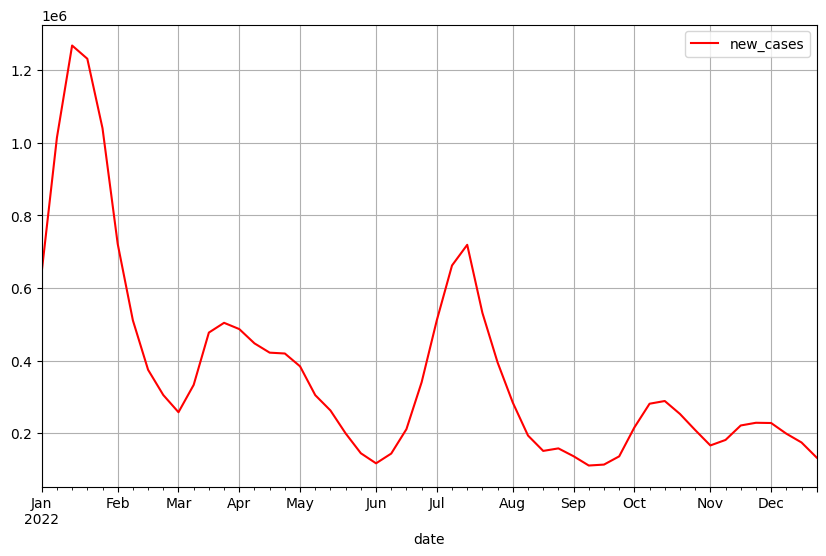

In [18]:
italianew.plot(x="date",y="new_cases",kind="line",color="red",figsize=(10,6),grid=True)

In [19]:
#k. poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni
df["new_cases"].isnull().sum()

0

In [20]:
#riempio i nulli con "0"
df["new_cases"]=df["new_cases"].fillna(0)

In [21]:
#Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo
# il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)
#a. scrivere un breve commento a riguardo

<Axes: xlabel='location', ylabel='icu_patients'>

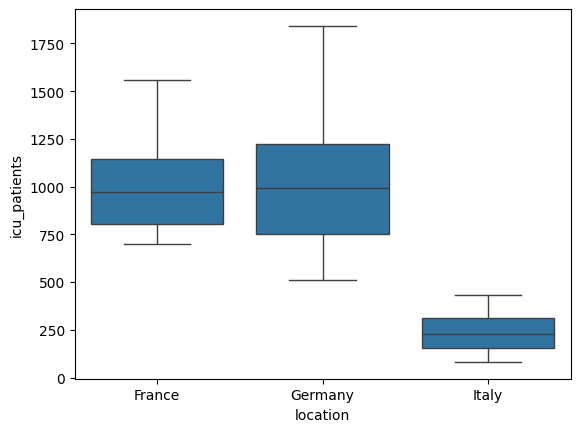

In [22]:
#importo la libreria seaborn per il grafico boxplot
import seaborn as sns

#Filtro delle nazioni
nazionidiff=df[(df["location"]=="Italy") | (df["location"]=="Germany") | (df["location"]=="France")][["location", "date", "icu_patients"]]

#Filtro dei dati per la data
filtro=nazionidiff[(nazionidiff["date"]>="2022-05-01") & (nazionidiff["date"]<="2023-04-30")]

#Creazione del boxplot
sns.boxplot(x="location",y="icu_patients",data=filtro)


In [23]:
#come possiamo notare in italia il numero di pazienti in terapia intensiva relativi dal 5 maggio del 2022 al 30 aprile del 2023
#è nettamente inferiori rispetto alla Francia e alla Germania

In [24]:
#scrivere un breve commento a riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:
#a mostrare la somma dei pazienti ospitalizzati per ognuna
#b se ci sono dati nulli, con un breve commento scrivere se puo essere possibile gestirli tramite sostituzione o meno

In [32]:
#cerco i dati nulli in "hosp_patient" e li gestisco con un fillna
df["hosp_patients"].isnull().sum()

0

In [31]:
#riempio i nulli con 0
df["hosp_patients"].fillna(0,inplace=True)

<ipython-input-31-18fb892a6b5f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["hosp_patients"].fillna(0,inplace=True)


In [35]:
#a mostrare la somma dei pazienti ospitalizzati per ognuna
a=df[(df["location"]=="italy") | (df["location"]=="Germany") | (df["location"]=="France")\
     | (df["location"]=="Spain")][["location","date","hosp_patients"]]
filtro2=a["date"].dt.year == 2023
filtro2=a[filtro2]
print(filtro2.groupby("location")["hosp_patients"].sum())

location
France     1382574.0
Germany          0.0
Spain       354602.0
Name: hosp_patients, dtype: float64


In [28]:
#la Germania nel 2023 non ha avuto pazienti ospedalizzati